# Data Exploration

## Load the data

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

### loading the data

In [2]:
phone_data = pd.read_csv('../dataset/Cellphone.csv')
phone_data

Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0           203   2357    10   135.0         5.20  424         8     1.350   
1           880   1749    10   125.0         4.00  233         2     1.300   
2            40   1916    10   110.0         4.70  312         4     1.200   
3            99   1315    11   118.5         4.00  233         2     1.300   
4           880   1749    11   125.0         4.00  233         2     1.300   
..          ...    ...   ...     ...          ...  ...       ...       ...   
156        1206   3551  4638   178.0         5.46  538         4     1.875   
157        1296   3211  8016   170.0         5.50  534         4     1.975   
158         856   3260  8809   150.0         5.50  401         8     2.200   
159        1296   3211  8946   170.0         5.50  534         4     1.975   
160        1131   2536  9807   202.0         6.00  367         8     1.500   

     internal mem    ram  RearCam  Front_Cam  battery  thickness  
0            16.0  3.000    13.00        8.0     2610        7.4  
1             4.0  1.000     3.15        0.0     1700        9.9  
2             8.0  1.500    13.00        5.0     2000        7.6  
3             4.0  0.512     3.15        0.0     1400       11.0  
4             4.0  1.000     3.15        0.0     1700        9.9  
..            ...    ...      ...        ...      ...        ...  
156         128.0  6.000    12.00       16.0     4080        8.4  
157         128.0  6.000    20.00        8.0     3400        7.9  
158          64.0  4.000    20.00       20.0     3000        6.8  
159         128.0  6.000    20.00        8.0     3400        7.9  
160          16.0  3.000    21.50       16.0     2700        8.4  

[161 rows x 14 columns]

### Explore the data

In [3]:
phone_data.describe()

Product_id        Price         Sale      weight  resoloution  \
count   161.000000   161.000000   161.000000  161.000000   161.000000   
mean    675.559006  2215.596273   621.465839  170.426087     5.209938   
std     410.851583   768.187171  1546.618517   92.888612     1.509953   
min      10.000000   614.000000    10.000000   66.000000     1.400000   
25%     237.000000  1734.000000    37.000000  134.100000     4.800000   
50%     774.000000  2258.000000   106.000000  153.000000     5.150000   
75%    1026.000000  2744.000000   382.000000  170.000000     5.500000   
max    1339.000000  4361.000000  9807.000000  753.000000    12.200000   

              ppi    cpu core    cpu freq  internal mem         ram  \
count  161.000000  161.000000  161.000000    161.000000  161.000000   
mean   335.055901    4.857143    1.502832     24.501714    2.204994   
std    134.826659    2.444016    0.599783     28.804773    1.609831   
min    121.000000    0.000000    0.000000      0.000000    0.000000   
25%    233.000000    4.000000    1.200000      8.000000    1.000000   
50%    294.000000    4.000000    1.400000     16.000000    2.000000   
75%    428.000000    8.000000    1.875000     32.000000    3.000000   
max    806.000000    8.000000    2.700000    128.000000    6.000000   

          RearCam   Front_Cam      battery   thickness  
count  161.000000  161.000000   161.000000  161.000000  
mean    10.378261    4.503106  2842.111801    8.921739  
std      6.181585    4.342053  1366.990838    2.192564  
min      0.000000    0.000000   800.000000    5.100000  
25%      5.000000    0.000000  2040.000000    7.600000  
50%     12.000000    5.000000  2800.000000    8.400000  
75%     16.000000    8.000000  3240.000000    9.800000  
max     23.000000   20.000000  9500.000000   18.500000

### It looks like we have a lot of work to do to this data

### In the resolution column

What Does This Look Like?
These numbers don't represent screen resolution like 1920x1080 or 1280x720.
They look more like screen size in inches, not resolution.

💡 So What's Going On?
It seems the column named resoloution is actually screen size.

The actual resolution (e.g. pixel dimensions like 1080x2400) is missing.

In [4]:
phone_data.rename(columns = {'resoloution':'Screen_size'}, inplace= True)

#### Lets check for duplicates

In [5]:
phone_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
156    False
157    False
158    False
159    False
160    False
Length: 161, dtype: bool

In [6]:
phone_data['Product_id'].value_counts()

Product_id
1296    2
1198    2
1112    2
696     2
1089    2
       ..
40      1
10      1
622     1
203     1
856     1
Name: count, Length: 83, dtype: int64

In [7]:
phone_data['Product_id'].duplicated().sum()

78

### 78 Duplicated Values for a unique key column, Wow

In [8]:
# Find duplicated product_ids (including both the first and the actual duplicates)
duplicates = phone_data[phone_data.duplicated('Product_id', keep=False)]
duplicates

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
1           880   1749    10   125.0         4.00  233         2     1.300   
3            99   1315    11   118.5         4.00  233         2     1.300   
4           880   1749    11   125.0         4.00  233         2     1.300   
5           947   2137    12   150.0         5.50  401         4     2.300   
6           774   1238    13   134.1         4.00  233         2     1.200   
..          ...    ...   ...     ...          ...  ...       ...       ...   
155        1206   3551  4408   178.0         5.46  538         4     1.875   
156        1206   3551  4638   178.0         5.46  538         4     1.875   
157        1296   3211  8016   170.0         5.50  534         4     1.975   
159        1296   3211  8946   170.0         5.50  534         4     1.975   
160        1131   2536  9807   202.0         6.00  367         8     1.500   

     internal mem    ram  RearCam  Front_Cam  battery  thickness  
1             4.0  1.000     3.15        0.0     1700        9.9  
3             4.0  0.512     3.15        0.0     1400       11.0  
4             4.0  1.000     3.15        0.0     1700        9.9  
5            16.0  2.000    16.00        8.0     2500        9.5  
6             8.0  1.000     2.00        0.0     1560       11.7  
..            ...    ...      ...        ...      ...        ...  
155         128.0  6.000    12.00       16.0     4080        8.4  
156         128.0  6.000    12.00       16.0     4080        8.4  
157         128.0  6.000    20.00        8.0     3400        7.9  
159         128.0  6.000    20.00        8.0     3400        7.9  
160          16.0  3.000    21.50       16.0     2700        8.4  

[156 rows x 14 columns]

In [9]:
# Group by Product_id to compare duplicated entries
grouped = duplicates.sort_values('Product_id').groupby('Product_id')

for product_id, group_df in grouped:
    print(f"Product ID: {product_id}")
    print(group_df)
    print("===")


Product ID: 14
    Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
71          14   2276    91   116.0          5.0  294         8       1.5   
75          14   2276    98   116.0          5.0  294         8       1.5   

    internal mem  ram  RearCam  Front_Cam  battery  thickness  
71          16.0  2.0     13.0        5.0     2300        7.8  
75          16.0  2.0     13.0        5.0     2300        7.8  
===
Product ID: 30
     Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
111          30   2975   302   149.0          5.5  534         8       1.6   
112          30   2975   307   149.0          5.5  534         8       1.6   

     internal mem  ram  RearCam  Front_Cam  battery  thickness  
111          32.0  3.0     16.0        8.0     3000        7.0  
112          32.0  3.0     16.0        8.0     3000        7.0  
===
Product ID: 32
     Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
145          32

## *It looks like the database engineer inserted a new row each time the sale Increased*

In [10]:
# See differences across duplicated entries
diffs = duplicates.sort_values('Product_id').groupby('Product_id').nunique()
print(diffs)

            Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
Product_id                                                              
14              1     2       1            1    1         1         1   
30              1     2       1            1    1         1         1   
32              1     2       1            1    1         1         1   
43              1     2       1            1    1         1         1   
56              1     2       1            1    1         1         1   
...           ...   ...     ...          ...  ...       ...       ...   
1221            1     2       1            1    1         1         1   
1248            1     2       1            1    1         1         1   
1296            1     2       1            1    1         1         1   
1327            1     2       1            1    1         1         1   
1339            1     2       1            1    1         1         1   

            internal mem  ram  RearCam  Front_Cam 

## the prev cell proves it

In [11]:
# now lets remove the duplicated rows, but we will remove the one with the smallest(not updated) sale
phone_data = phone_data.sort_values('Sale', ascending=False).drop_duplicates('Product_id',keep = "first")
phone_data

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
160        1131   2536  9807   202.0         6.00  367         8     1.500   
159        1296   3211  8946   170.0         5.50  534         4     1.975   
158         856   3260  8809   150.0         5.50  401         8     2.200   
156        1206   3551  4638   178.0         5.46  538         4     1.875   
153         290   4361  3291   238.0         5.70  515         8     1.950   
..          ...    ...   ...     ...          ...  ...       ...       ...   
8            99   1315    14   118.5         4.00  233         2     1.300   
7           947   2137    13   150.0         5.50  401         4     2.300   
4           880   1749    11   125.0         4.00  233         2     1.300   
2            40   1916    10   110.0         4.70  312         4     1.200   
0           203   2357    10   135.0         5.20  424         8     1.350   

     internal mem    ram  RearCam  Front_Cam  battery  thickness  
160          16.0  3.000    21.50       16.0     2700        8.4  
159         128.0  6.000    20.00        8.0     3400        7.9  
158          64.0  4.000    20.00       20.0     3000        6.8  
156         128.0  6.000    12.00       16.0     4080        8.4  
153         128.0  6.000    12.00        8.0     7000        7.4  
..            ...    ...      ...        ...      ...        ...  
8             4.0  0.512     3.15        0.0     1400       11.0  
7            16.0  2.000    16.00        8.0     2500        9.5  
4             4.0  1.000     3.15        0.0     1700        9.9  
2             8.0  1.500    13.00        5.0     2000        7.6  
0            16.0  3.000    13.00        8.0     2610        7.4  

[83 rows x 14 columns]

In [12]:
phone_data = phone_data.sort_values('Product_id')
phone_data.reset_index(drop = True, inplace = True)
phone_data

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
0           10   1950    26   118.0         5.00  187         4     1.300   
1           14   2276    98   116.0         5.00  294         8     1.500   
2           30   2975   307   149.0         5.50  534         8     1.600   
3           32   1921  1862   179.0         6.00  184         4     1.300   
4           40   1916    10   110.0         4.70  312         4     1.200   
..         ...    ...   ...     ...          ...  ...       ...       ...   
78        1221   2714   106   156.0         5.50  401         8     1.350   
79        1248   3658    52   168.0         5.15  428         8     2.450   
80        1296   3211  8946   170.0         5.50  534         4     1.975   
81        1327   2001   399   194.8         5.70  258         4     1.200   
82        1339   1421    40   120.0         4.00  233         2     1.000   

    internal mem    ram  RearCam  Front_Cam  battery  thickness  
0            8.0  1.000      8.0        2.0     2000        6.4  
1           16.0  2.000     13.0        5.0     2300        7.8  
2           32.0  3.000     16.0        8.0     3000        7.0  
3            8.0  1.000     13.0        8.0     2580        8.0  
4            8.0  1.500     13.0        5.0     2000        7.6  
..           ...    ...      ...        ...      ...        ...  
78          16.0  2.000     13.0        5.0     2300        5.1  
79          64.0  6.000     12.0        8.0     3350        7.5  
80         128.0  6.000     20.0        8.0     3400        7.9  
81          16.0  2.000      8.0        1.0     3400       10.2  
82           4.0  0.512      2.0        0.0     1200        9.8  

[83 rows x 14 columns]

## lets explore the data after cleaning

In [13]:
phone_data.describe()

Product_id        Price         Sale      weight  Screen_size  \
count    83.000000    83.000000    83.000000   83.000000    83.000000   
mean    665.638554  2219.084337   713.277108  169.226506     5.206024   
std     413.913140   763.850279  1817.535938   92.039427     1.492304   
min      10.000000   614.000000    10.000000   66.000000     1.400000   
25%     227.500000  1737.500000    38.500000  134.050000     4.900000   
50%     763.000000  2258.000000   109.000000  152.000000     5.150000   
75%    1023.000000  2744.000000   392.000000  170.000000     5.500000   
max    1339.000000  4361.000000  9807.000000  753.000000    12.200000   

              ppi   cpu core   cpu freq  internal mem        ram    RearCam  \
count   83.000000  83.000000  83.000000     83.000000  83.000000  83.000000   
mean   334.710843   4.879518   1.501843     24.438410   2.201831  10.469277   
std    134.002505   2.441499   0.595929     28.691272   1.603925   6.164116   
min    121.000000   0.000000   0.000000      0.000000   0.000000   0.000000   
25%    233.000000   4.000000   1.200000      8.000000   1.000000   5.000000   
50%    294.000000   4.000000   1.400000     16.000000   2.000000  12.000000   
75%    428.000000   8.000000   1.875000     32.000000   3.000000  16.000000   
max    806.000000   8.000000   2.700000    128.000000   6.000000  23.000000   

       Front_Cam      battery  thickness  
count  83.000000    83.000000  83.000000  
mean    4.608434  2826.445783   8.872289  
std     4.467940  1355.098217   2.186729  
min     0.000000   800.000000   5.100000  
25%     0.450000  2020.000000   7.600000  
50%     5.000000  2700.000000   8.400000  
75%     8.000000  3220.000000   9.750000  
max    20.000000  9500.000000  18.500000

## *the min value in*
> cpu core/
> cpu freq/
> internal mem/
> ram/
> RearCam/
> Front_Cam
## are meant to be null because these data are not supposed to be zero

In [14]:
cols_with_invalid_zeros = ["cpu core", "cpu freq", "internal mem", "ram", "RearCam", "Front_Cam"]
phone_data[cols_with_invalid_zeros] = phone_data[cols_with_invalid_zeros].replace(0, np.nan)

In [15]:
phone_data.isnull().sum()

Product_id       0
Price            0
Sale             0
weight           0
Screen_size      0
ppi              0
cpu core         5
cpu freq         5
internal mem     5
ram              1
RearCam          4
Front_Cam       21
battery          0
thickness        0
dtype: int64

In [16]:
phone_data.groupby('cpu core')[['cpu freq', 'ram', 'internal mem', 'Price', 'ppi', 'battery']].mean()

cpu freq       ram  internal mem        Price         ppi  \
cpu core                                                              
1.0       0.208000  0.004000           NaN   791.000000  121.000000   
2.0       1.214286  0.790857      5.333333  1413.428571  222.428571   
4.0       1.634881  2.269171     27.121951  2206.238095  337.833333   
6.0       1.530000  3.000000     32.000000  2824.000000  401.000000   
8.0       1.694444  3.000000     31.555556  2758.481481  399.814815   

              battery  
cpu core               
1.0        800.000000  
2.0       1811.428571  
4.0       2873.214286  
6.0       3500.000000  
8.0       3420.000000

In [17]:
phone_data.groupby('cpu freq')[['cpu core', 'ram', 'internal mem', 'Price', 'ppi', 'battery']].mean()

cpu core       ram  internal mem        Price         ppi  \
cpu freq                                                              
0.208     1.000000  0.004000           NaN   791.000000  121.000000   
1.000     3.000000  0.756000      6.000000  1702.500000  263.500000   
1.200     3.666667  1.148471      9.250000  1666.000000  241.166667   
1.250     8.000000  2.000000     16.000000  2744.000000  440.000000   
1.300     3.454545  1.321455     12.363636  1872.454545  234.454545   
1.350     8.000000  2.333333     16.000000  2375.000000  409.333333   
1.400     8.000000  1.666667     14.666667  2221.333333  258.666667   
1.500     8.000000  3.250000     32.000000  2591.500000  334.750000   
1.530     6.000000  3.000000     32.000000  2824.000000  401.000000   
1.550     8.000000  2.000000     32.000000  2654.000000  386.000000   
1.600     8.000000  3.000000     32.000000  2733.000000  390.500000   
1.700     8.000000  1.500000     16.000000  2442.500000  336.500000   
1.750     8.000000  3.000000     32.000000  3209.000000  617.000000   
1.800     8.000000  3.500000     32.000000  2845.000000  450.500000   
1.830     4.000000  4.000000     64.000000  2746.000000  401.000000   
1.875     4.000000  5.000000     74.666667  3183.000000  507.000000   
1.950     8.000000  6.000000    128.000000  4361.000000  515.000000   
1.975     4.000000  6.000000    128.000000  3211.000000  534.000000   
2.000     8.000000  3.000000     20.000000  2665.500000  342.000000   
2.100     8.000000  4.000000     32.000000  2880.000000  432.000000   
2.150     4.000000  2.000000     16.000000  1942.000000  469.000000   
2.200     8.000000  4.000000     64.000000  3260.000000  401.000000   
2.260     4.000000  2.000000     16.000000  2124.000000  224.000000   
2.300     5.000000  2.500000     24.000000  2445.250000  465.000000   
2.450     8.000000  6.000000     64.000000  3658.000000  428.000000   
2.500     4.000000  2.333333     16.000000  2477.000000  429.333333   
2.700     4.000000  3.000000     32.000000  2605.000000  529.000000   

              battery  
cpu freq               
0.208      800.000000  
1.000     2170.000000  
1.200     2432.500000  
1.250     2700.000000  
1.300     2300.000000  
1.350     2846.666667  
1.400     2433.333333  
1.500     3050.000000  
1.530     3500.000000  
1.550     3050.000000  
1.600     6250.000000  
1.700     2515.000000  
1.750     3180.000000  
1.800     3025.000000  
1.830     4000.000000  
1.875     3471.666667  
1.950     7000.000000  
1.975     3400.000000  
2.000     4530.000000  
2.100     3200.000000  
2.150     2200.000000  
2.200     3000.000000  
2.260     7400.000000  
2.300     2600.000000  
2.450     3350.000000  
2.500     2900.000000  
2.700     3000.000000

## I did this to estimate the missing cpu core

In [18]:
phone_data.loc[phone_data['cpu core'].isna()]

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
7           64    754   308    77.9          2.4  167       NaN       NaN   
38         701    628  1274   102.9          2.2  128       NaN       NaN   
46         826    614  2171    69.8          1.4  129       NaN       NaN   
47         827    833   213    78.4          2.4  166       NaN       NaN   
75        1198    705   427   110.0          2.2  128       NaN       NaN   

    internal mem    ram  RearCam  Front_Cam  battery  thickness  
7          0.004  0.004      NaN        NaN      850       12.4  
38         0.256  0.128      1.3        NaN      950       18.5  
46           NaN  0.004      NaN        NaN      800       14.1  
47           NaN  0.008      NaN        NaN     1100       12.9  
75         0.128  0.032      2.0        NaN      900       15.6

## Now I think that the five missing values in cpu core and cpu freq are most likely to be(1 core) and (0.208 Hz -freq unit-)

In [19]:
phone_data.loc[phone_data['cpu core'].isna(), 'cpu core'] = 1
phone_data.loc[phone_data['cpu freq'].isna(), 'cpu freq'] = 0.208 

In [20]:
phone_data.isna().sum()

Product_id       0
Price            0
Sale             0
weight           0
Screen_size      0
ppi              0
cpu core         0
cpu freq         0
internal mem     5
ram              1
RearCam          4
Front_Cam       21
battery          0
thickness        0
dtype: int64

## The whole ram column should be droped because the data must be a power of 2, but the data has fractions and random numbers

In [21]:
phone_data.drop(columns = 'ram', inplace = True)

In [22]:
phone_data

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
0           10   1950    26   118.0         5.00  187       4.0     1.300   
1           14   2276    98   116.0         5.00  294       8.0     1.500   
2           30   2975   307   149.0         5.50  534       8.0     1.600   
3           32   1921  1862   179.0         6.00  184       4.0     1.300   
4           40   1916    10   110.0         4.70  312       4.0     1.200   
..         ...    ...   ...     ...          ...  ...       ...       ...   
78        1221   2714   106   156.0         5.50  401       8.0     1.350   
79        1248   3658    52   168.0         5.15  428       8.0     2.450   
80        1296   3211  8946   170.0         5.50  534       4.0     1.975   
81        1327   2001   399   194.8         5.70  258       4.0     1.200   
82        1339   1421    40   120.0         4.00  233       2.0     1.000   

    internal mem  RearCam  Front_Cam  battery  thickness  
0            8.0      8.0        2.0     2000        6.4  
1           16.0     13.0        5.0     2300        7.8  
2           32.0     16.0        8.0     3000        7.0  
3            8.0     13.0        8.0     2580        8.0  
4            8.0     13.0        5.0     2000        7.6  
..           ...      ...        ...      ...        ...  
78          16.0     13.0        5.0     2300        5.1  
79          64.0     12.0        8.0     3350        7.5  
80         128.0     20.0        8.0     3400        7.9  
81          16.0      8.0        1.0     3400       10.2  
82           4.0      2.0        NaN     1200        9.8  

[83 rows x 13 columns]

In [23]:
phone_data['RearCam'].value_counts()

RearCam
13.00    15
8.00     12
16.00    12
5.00     11
12.00     6
2.00      5
3.15      3
21.00     3
20.00     3
20.70     2
3.00      1
12.30     1
4.00      1
1.30      1
10.00     1
21.50     1
23.00     1
Name: count, dtype: int64

In [24]:
phone_data['Front_Cam'].value_counts()

Front_Cam
5.0     22
8.0     15
2.0      8
16.0     4
1.2      2
13.0     2
5.1      2
4.0      1
2.1      1
0.9      1
3.7      1
20.0     1
2.2      1
1.0      1
Name: count, dtype: int64

In [25]:
phone_data.loc[phone_data['internal mem'].isna()]

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
16         183   1522   204   160.0         5.00  220       2.0     1.200   
46         826    614  2171    69.8         1.40  129       1.0     0.208   
47         827    833   213    78.4         2.40  166       1.0     0.208   
62        1026    791   114    66.0         1.50  121       1.0     0.208   
66        1089   1357   564   165.0         4.66  200       4.0     1.200   

    internal mem  RearCam  Front_Cam  battery  thickness  
16           NaN      8.0        NaN     2500       10.8  
46           NaN      NaN        NaN      800       14.1  
47           NaN      NaN        NaN     1100       12.9  
62           NaN      NaN        NaN      800       13.2  
66           NaN      5.0        NaN     2600       11.6

In [26]:
phone_data.head(15)

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
0           10   1950    26   118.0          5.0  187       4.0     1.300   
1           14   2276    98   116.0          5.0  294       8.0     1.500   
2           30   2975   307   149.0          5.5  534       8.0     1.600   
3           32   1921  1862   179.0          6.0  184       4.0     1.300   
4           40   1916    10   110.0          4.7  312       4.0     1.200   
5           43   1347    67   260.0          7.0  170       2.0     1.300   
6           56   2044    93   310.0          8.0  283       8.0     2.000   
7           64    754   308    77.9          2.4  167       1.0     0.208   
8           66   1396   114   279.0          7.0  170       4.0     1.200   
9           93   1984    57   154.0          5.0  294       4.0     1.000   
10          99   1315    14   118.5          4.0  233       2.0     1.300   
11         104   1942    34   139.2          4.7  469       4.0     2.150   
12         131   1831   156   154.0          5.0  294       4.0     1.200   
13         133   2744   214   142.0          5.0  440       8.0     1.250   
14         143   3287   367   170.0          5.5  401       8.0     2.000   

    internal mem  RearCam  Front_Cam  battery  thickness  
0          8.000     8.00        2.0     2000        6.4  
1         16.000    13.00        5.0     2300        7.8  
2         32.000    16.00        8.0     3000        7.0  
3          8.000    13.00        8.0     2580        8.0  
4          8.000    13.00        5.0     2000        7.6  
5          4.000     2.00        NaN     2820        9.1  
6          8.000     5.00        2.0     4060        7.3  
7          0.004      NaN        NaN      850       12.4  
8          4.000     3.00        NaN     3240        9.0  
9          8.000     8.00        5.0     3140        8.1  
10         4.000     3.15        NaN     1400       11.0  
11        16.000    16.00        4.0     2200       10.3  
12         8.000    13.00        5.0     2100        8.4  
13        16.000    16.00        8.0     2700        8.0  
14        32.000    12.00       13.0     5000        8.0

# We have alot of important insights, we have some outliers, first how can a sale be much greater than the main Price, second how can the internal mem be fraction

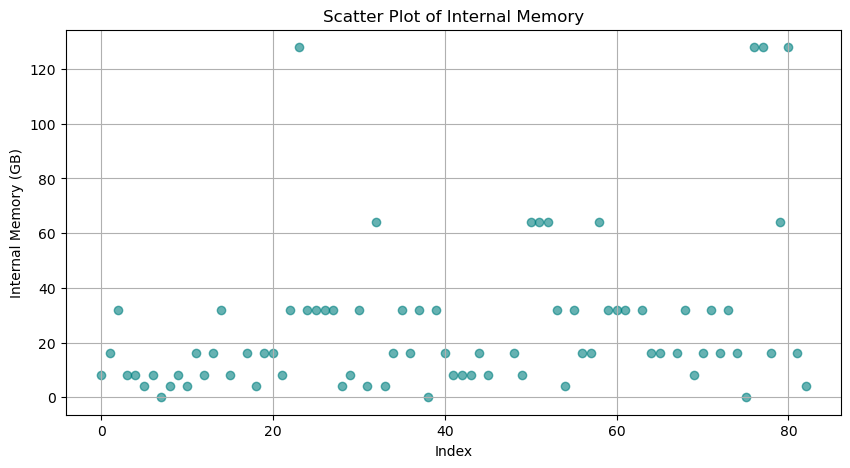

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(phone_data.index, phone_data['internal mem'], alpha=0.6, c='teal')
plt.title("Scatter Plot of Internal Memory")
plt.xlabel("Index")
plt.ylabel("Internal Memory (GB)")
plt.grid(True)
plt.show()


Values scattered across a wide continuous range

Several weird values like ~0, ~5, ~33, and even >128

These aren’t powers of two, and some are fractional — which is not realistic for internal storage

In [28]:
phone_data.loc[phone_data['internal mem'] > 60]

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
23         290   4361  3291   238.0         5.70  515       8.0     1.950   
32         577   2746    75   158.0         5.50  401       4.0     1.830   
50         851   3055  2173   158.0         5.50  401       4.0     1.875   
51         856   3260  8809   150.0         5.50  401       8.0     2.200   
52         857   3116   996   153.0         5.50  401       8.0     1.500   
58         974   2859    43   169.0         5.70  515       4.0     1.875   
76        1206   3551  4638   178.0         5.46  538       4.0     1.875   
77        1216   3837   119   167.8         5.43  541       4.0     1.875   
79        1248   3658    52   168.0         5.15  428       8.0     2.450   
80        1296   3211  8946   170.0         5.50  534       4.0     1.975   

    internal mem  RearCam  Front_Cam  battery  thickness  
23         128.0     12.0        8.0     7000        7.4  
32          64.0     13.0        5.0     4000        8.5  
50          64.0     16.0        8.0     3000        7.4  
51          64.0     20.0       20.0     3000        6.8  
52          64.0     13.0       16.0     3200        7.3  
58          64.0     12.0        5.0     3500        7.9  
76         128.0     12.0       16.0     4080        8.4  
77         128.0     16.0        8.0     3600        7.6  
79          64.0     12.0        8.0     3350        7.5  
80         128.0     20.0        8.0     3400        7.9

In [29]:
phone_data.loc[phone_data['internal mem'] < 20]

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
0           10   1950    26   118.0          5.0  187       4.0     1.300   
1           14   2276    98   116.0          5.0  294       8.0     1.500   
3           32   1921  1862   179.0          6.0  184       4.0     1.300   
4           40   1916    10   110.0          4.7  312       4.0     1.200   
5           43   1347    67   260.0          7.0  170       2.0     1.300   
6           56   2044    93   310.0          8.0  283       8.0     2.000   
7           64    754   308    77.9          2.4  167       1.0     0.208   
8           66   1396   114   279.0          7.0  170       4.0     1.200   
9           93   1984    57   154.0          5.0  294       4.0     1.000   
10          99   1315    14   118.5          4.0  233       2.0     1.300   
11         104   1942    34   139.2          4.7  469       4.0     2.150   
12         131   1831   156   154.0          5.0  294       4.0     1.200   
13         133   2744   214   142.0          5.0  440       8.0     1.250   
15         162   1843    41   133.5          4.5  218       4.0     1.300   
17         187   2258    26   150.0          5.0  441       4.0     2.300   
18         198   1734    89   128.0          4.5  245       4.0     1.200   
19         203   2357    10   135.0          5.2  424       8.0     1.350   
20         218   2323    87    97.0          4.8  306       8.0     1.700   
21         237   1646   141   404.0          8.0  160       4.0     1.200   
28         460   1734   382   118.0          4.0  245       4.0     1.200   
29         497   2266   615   112.0          5.0  294       8.0     1.400   
31         575   1777    45   174.0          5.5  178       4.0     1.300   
33         605   2006    24   161.0          5.5  200       8.0     1.400   
34         622   2174    16   140.0          5.0  294       4.0     1.300   
36         662   2124    37   489.0         10.1  224       4.0     2.260   
38         701    628  1274   102.9          2.2  128       1.0     0.208   
40         739   1989    57   131.0          5.0  294       4.0     1.300   
41         763   1302   140   127.9          4.0  235       2.0     1.200   
42         774   1238    20   134.1          4.0  233       2.0     1.200   
43         776   1390    25   146.0          5.0  220       4.0     1.200   
44         798   2054   385   169.0          5.5  403       8.0     1.350   
45         804   1741    57   145.0          4.5  245       4.0     1.200   
48         832   1676   268   150.0          5.0  294       4.0     1.200   
49         841   1511   198   134.0          4.5  221       4.0     1.200   
54         880   1749    11   125.0          4.0  233       2.0     1.300   
56         937   2571   100    97.0          4.8  306       4.0     1.200   
57         947   2137    13   150.0          5.5  401       4.0     2.300   
64        1062   1810   166   393.0          8.0  189       4.0     1.200   
65        1080   2343   206   158.0          5.1  432       4.0     2.500   
67        1103   2580    16   145.0          5.1  432       4.0     2.500   
69        1120   1612    19   141.0          5.0  294       4.0     1.200   
70        1131   2536  9807   202.0          6.0  367       8.0     1.500   
72        1143   2562   179   187.0          6.0  367       8.0     1.700   
74        1161   2508  1584   152.0          5.2  424       4.0     2.500   
75        1198    705   427   110.0          2.2  128       1.0     0.208   
78        1221   2714   106   156.0          5.5  401       8.0     1.350   
81        1327   2001   399   194.8          5.7  258       4.0     1.200   
82        1339   1421    40   120.0          4.0  233       2.0     1.000   

    internal mem  RearCam  Front_Cam  battery  thickness  
0          8.000     8.00        2.0     2000        6.4  
1         16.000    13.00        5.0     2300        7.8  
3          8.000    13.00        8.0     2580        

# descesion.
## any internal mem < 1 must be changed to 4, and any 128 phone must be changed to 64 because they are outliers and could affect the model

In [30]:
phone_data.loc[phone_data['internal mem'] < 1, 'internal mem'] = 4
phone_data.loc[phone_data['internal mem'] == 128, 'internal mem'] = 64

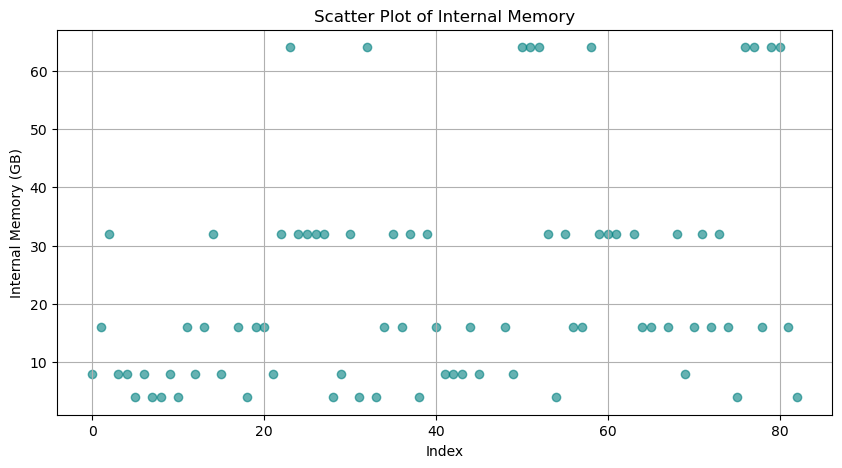

In [31]:
plt.figure(figsize=(10, 5))
plt.scatter(phone_data.index, phone_data['internal mem'], alpha=0.6, c='teal')
plt.title("Scatter Plot of Internal Memory")
plt.xlabel("Index")
plt.ylabel("Internal Memory (GB)")
plt.grid(True)
plt.show()

In [32]:
phone_data.loc[phone_data['internal mem'] >= 32]

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
2           30   2975   307   149.0         5.50  534       8.0     1.600   
14         143   3287   367   170.0         5.50  401       8.0     2.000   
22         289   2438    21   162.0         5.30  277       8.0     1.500   
23         290   4361  3291   238.0         5.70  515       8.0     1.950   
24         301   2445   678   183.0         5.00  294       4.0     1.300   
25         315   2938    25   168.0         5.50  534       4.0     1.875   
26         377   2409  1043   160.0         5.00  441       4.0     2.300   
27         409   2880   418   145.0         5.10  432       8.0     2.100   
30         563   2824    73   175.0         5.50  401       6.0     1.530   
32         577   2746    75   158.0         5.50  401       4.0     1.830   
35         637   2858   309   174.0         5.70  513       4.0     1.875   
37         696   2466   567   154.0         5.50  534       4.0     2.700   
39         738   2685    72   168.0         5.70  386       8.0     1.800   
50         851   3055  2173   158.0         5.50  401       4.0     1.875   
51         856   3260  8809   150.0         5.50  401       8.0     2.200   
52         857   3116   996   153.0         5.50  401       8.0     1.500   
53         860   2392    36   147.0         5.20  282       8.0     1.400   
55         907   2087    40   147.0         5.00  294       4.0     1.300   
58         974   2859    43   169.0         5.70  515       4.0     1.875   
59         990   2977    26   152.0         5.10  577       8.0     2.300   
60        1011   3005   109   171.0         5.70  515       8.0     1.800   
61        1020   2654    32   151.0         5.70  386       8.0     1.550   
63        1058   2744    23   174.0         5.60  524       4.0     2.700   
68        1112   2491   456   753.0        12.20  247       8.0     1.600   
71        1137   3102  2088   180.0         5.50  806       8.0     1.750   
73        1145   3316    41   144.0         5.20  428       8.0     1.750   
76        1206   3551  4638   178.0         5.46  538       4.0     1.875   
77        1216   3837   119   167.8         5.43  541       4.0     1.875   
79        1248   3658    52   168.0         5.15  428       8.0     2.450   
80        1296   3211  8946   170.0         5.50  534       4.0     1.975   

    internal mem  RearCam  Front_Cam  battery  thickness  
2           32.0     16.0        8.0     3000        7.0  
14          32.0     12.0       13.0     5000        8.0  
22          32.0     13.0        8.0     4000        7.7  
23          64.0     12.0        8.0     7000        7.4  
24          32.0      8.0        5.0     4000        8.5  
25          32.0     12.3        8.0     3450        8.5  
26          32.0      4.0        5.0     2600        9.4  
27          32.0     20.0        8.0     3200        7.0  
30          32.0     21.0        8.0     3500        9.3  
32          64.0     13.0        5.0     4000        8.5  
35          32.0     16.0        5.0     3200        7.6  
37          32.0     13.0        2.1     3000        9.1  
39          32.0     21.0        5.0     3050        7.5  
50          64.0     16.0        8.0     3000        7.4  
51          64.0     20.0       20.0     3000        6.8  
52          64.0     13.0       16.0     3200        7.3  
53          32.0     13.0       16.0     2900        7.7  
55          32.0      8.0        5.0     2450        7.6  
58          64.0     12.0        5.0     3500        7.9  
59          32.0     12.0        5.0     3000        7.9  
60          32.0     16.0        5.0     3000        7.6  
61          32.0     16.0        5.0     3050        5.9  
63          32.0     16.0        3.7     3000        8.3  
68          32.0      8.0        2.0     9500        8.0  
71          32.0     23.0        5.1     3430        7.8  
73          32.0     20.7        5.1     2930        6.9  
76          64.0     12

# Now the internal mem data looks more Realistic

#### lets get rid of the null values 

In [33]:
phone_data.loc[(phone_data['internal mem'].isna()) & (phone_data['Price'] < 1000), 'internal mem'] = 4

In [34]:
phone_data.loc[phone_data['internal mem'].isna(), 'internal mem'] = 8

## We did clean the internal mem, lets move to the next

In [35]:
median_rear = phone_data['RearCam'].median()
phone_data['RearCam'].fillna(median_rear, inplace=True)

In [36]:
phone_data.isna().sum()

Product_id       0
Price            0
Sale             0
weight           0
Screen_size      0
ppi              0
cpu core         0
cpu freq         0
internal mem     0
RearCam          0
Front_Cam       21
battery          0
thickness        0
dtype: int64

In [37]:
phone_data.loc[phone_data['Front_Cam'].isna()]

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
5           43   1347    67   260.0         7.00  170       2.0     1.300   
7           64    754   308    77.9         2.40  167       1.0     0.208   
8           66   1396   114   279.0         7.00  170       4.0     1.200   
10          99   1315    14   118.5         4.00  233       2.0     1.300   
15         162   1843    41   133.5         4.50  218       4.0     1.300   
16         183   1522   204   160.0         5.00  220       2.0     1.200   
18         198   1734    89   128.0         4.50  245       4.0     1.200   
31         575   1777    45   174.0         5.50  178       4.0     1.300   
33         605   2006    24   161.0         5.50  200       8.0     1.400   
38         701    628  1274   102.9         2.20  128       1.0     0.208   
41         763   1302   140   127.9         4.00  235       2.0     1.200   
42         774   1238    20   134.1         4.00  233       2.0     1.200   
45         804   1741    57   145.0         4.50  245       4.0     1.200   
46         826    614  2171    69.8         1.40  129       1.0     0.208   
47         827    833   213    78.4         2.40  166       1.0     0.208   
49         841   1511   198   134.0         4.50  221       4.0     1.200   
54         880   1749    11   125.0         4.00  233       2.0     1.300   
62        1026    791   114    66.0         1.50  121       1.0     0.208   
66        1089   1357   564   165.0         4.66  200       4.0     1.200   
75        1198    705   427   110.0         2.20  128       1.0     0.208   
82        1339   1421    40   120.0         4.00  233       2.0     1.000   

    internal mem  RearCam  Front_Cam  battery  thickness  
5            4.0     2.00        NaN     2820        9.1  
7            4.0    12.00        NaN      850       12.4  
8            4.0     3.00        NaN     3240        9.0  
10           4.0     3.15        NaN     1400       11.0  
15           8.0     5.00        NaN     1600       10.1  
16           8.0     8.00        NaN     2500       10.8  
18           4.0     8.00        NaN     1840        8.5  
31           4.0     5.00        NaN     2250        9.2  
33           4.0     5.00        NaN     2500        8.9  
38           4.0     1.30        NaN      950       18.5  
41           8.0     2.00        NaN     1500       10.6  
42           8.0     2.00        NaN     1560       11.7  
45           8.0     5.00        NaN     2390       12.3  
46           4.0    12.00        NaN      800       14.1  
47           4.0    12.00        NaN     1100       12.9  
49           8.0     5.00        NaN     1830        9.2  
54           4.0     3.15        NaN     1700        9.9  
62           4.0    12.00        NaN      800       13.2  
66           8.0     5.00        NaN     2600       11.6  
75           4.0     2.00        NaN      900       15.6  
82           4.0     2.00        NaN     1200        9.8

<AxesSubplot: xlabel='Front_Cam', ylabel='Count'>

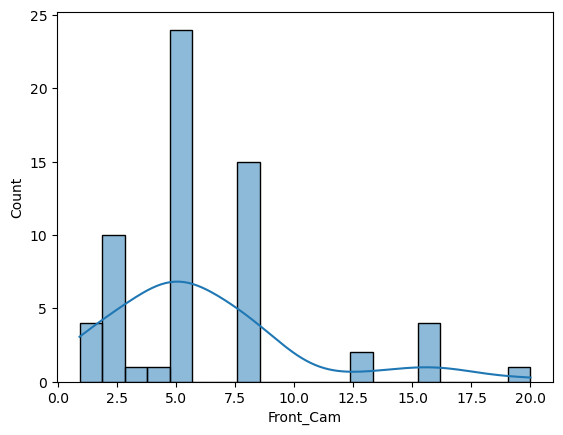

In [38]:
import seaborn as sns
sns.histplot(phone_data['Front_Cam'], bins=20, kde=True)

In [39]:
phone_data.corr()['Front_Cam'].sort_values(ascending=False)

Front_Cam       1.000000
Sale            0.549552
Price           0.483248
internal mem    0.465179
cpu core        0.423143
RearCam         0.334329
ppi             0.185715
Product_id      0.055140
cpu freq        0.006783
battery        -0.000748
Screen_size    -0.136713
weight         -0.182223
thickness      -0.226515
Name: Front_Cam, dtype: float64

In [40]:
phone_data.groupby('Front_Cam')[['internal mem', 'Price', 'RearCam','cpu core']].mean()

internal mem        Price    RearCam  cpu core
Front_Cam                                                
0.9           16.000000  1676.000000  10.000000  4.000000
1.0           16.000000  2001.000000   8.000000  4.000000
1.2           12.000000  1711.000000   5.575000  4.000000
2.0           14.500000  2190.500000   9.500000  5.000000
2.1           32.000000  2466.000000  13.000000  4.000000
2.2           16.000000  2508.000000  20.700000  4.000000
3.7           32.000000  2744.000000  16.000000  4.000000
4.0           16.000000  1942.000000  16.000000  4.000000
5.0           24.363636  2345.136364  11.772727  5.454545
5.1           32.000000  3209.000000  21.850000  8.000000
8.0           36.266667  2906.800000  14.953333  6.266667
13.0          24.000000  2924.500000  12.500000  8.000000
16.0          44.000000  2898.750000  14.875000  7.000000
20.0          64.000000  3260.000000  20.000000  8.000000

In [41]:
fc_summary = phone_data.groupby('Front_Cam')[['internal mem', 'Price', 'RearCam','cpu core']].mean()

# Function to fill Front_Cam based on similarity
def impute_front_cam(row):
    if pd.notna(row['Front_Cam']):
        return row['Front_Cam']
    
    features = ['internal mem', 'Price', 'RearCam', 'cpu core']
    input_vector = row[features].values.astype(float)
    
    # Calculate distance to each summary row
    distances = fc_summary[features].apply(lambda x: np.linalg.norm(input_vector - x.values), axis=1)
    
    # Return the Front_Cam value with the smallest distance
    return distances.idxmin()

# Apply the function to rows with missing Front_Cam
phone_data['Front_Cam'] = phone_data.apply(impute_front_cam, axis=1)

In [42]:
phone_data.isna().sum()

Product_id      0
Price           0
Sale            0
weight          0
Screen_size     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [43]:
phone_data.head(15)

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
0           10   1950    26   118.0          5.0  187       4.0     1.300   
1           14   2276    98   116.0          5.0  294       8.0     1.500   
2           30   2975   307   149.0          5.5  534       8.0     1.600   
3           32   1921  1862   179.0          6.0  184       4.0     1.300   
4           40   1916    10   110.0          4.7  312       4.0     1.200   
5           43   1347    67   260.0          7.0  170       2.0     1.300   
6           56   2044    93   310.0          8.0  283       8.0     2.000   
7           64    754   308    77.9          2.4  167       1.0     0.208   
8           66   1396   114   279.0          7.0  170       4.0     1.200   
9           93   1984    57   154.0          5.0  294       4.0     1.000   
10          99   1315    14   118.5          4.0  233       2.0     1.300   
11         104   1942    34   139.2          4.7  469       4.0     2.150   
12         131   1831   156   154.0          5.0  294       4.0     1.200   
13         133   2744   214   142.0          5.0  440       8.0     1.250   
14         143   3287   367   170.0          5.5  401       8.0     2.000   

    internal mem  RearCam  Front_Cam  battery  thickness  
0            8.0     8.00        2.0     2000        6.4  
1           16.0    13.00        5.0     2300        7.8  
2           32.0    16.00        8.0     3000        7.0  
3            8.0    13.00        8.0     2580        8.0  
4            8.0    13.00        5.0     2000        7.6  
5            4.0     2.00        0.9     2820        9.1  
6            8.0     5.00        2.0     4060        7.3  
7            4.0    12.00        0.9      850       12.4  
8            4.0     3.00        0.9     3240        9.0  
9            8.0     8.00        5.0     3140        8.1  
10           4.0     3.15        0.9     1400       11.0  
11          16.0    16.00        4.0     2200       10.3  
12           8.0    13.00        5.0     2100        8.4  
13          16.0    16.00        8.0     2700        8.0  
14          32.0    12.00       13.0     5000        8.0

In [44]:
phone_data['Front_Cam'].value_counts()

Front_Cam
5.0     22
0.9     16
8.0     15
2.0      8
1.2      6
16.0     4
13.0     2
4.0      2
5.1      2
1.0      2
20.0     1
2.1      1
3.7      1
2.2      1
Name: count, dtype: int64

# Note That I didn't replace the null value with mode or median because the number of null values was 21!!!!
# That was a huge section from the dataset (I'm working with only 83 records), you should keep on mind what is the current sitution and how your actions gonna affect the dataset

In [45]:
phone_data.describe()

Product_id        Price         Sale      weight  Screen_size  \
count    83.000000    83.000000    83.000000   83.000000    83.000000   
mean    665.638554  2219.084337   713.277108  169.226506     5.206024   
std     413.913140   763.850279  1817.535938   92.039427     1.492304   
min      10.000000   614.000000    10.000000   66.000000     1.400000   
25%     227.500000  1737.500000    38.500000  134.050000     4.900000   
50%     763.000000  2258.000000   109.000000  152.000000     5.150000   
75%    1023.000000  2744.000000   392.000000  170.000000     5.500000   
max    1339.000000  4361.000000  9807.000000  753.000000    12.200000   

              ppi   cpu core   cpu freq  internal mem    RearCam  Front_Cam  \
count   83.000000  83.000000  83.000000     83.000000  83.000000  83.000000   
mean   334.710843   4.939759   1.514373     21.831325  11.047590   4.889157   
std    134.002505   2.328767   0.565256     18.670976   5.694338   4.205891   
min    121.000000   1.000000   0.208000      4.000000   1.300000   0.900000   
25%    233.000000   4.000000   1.200000      8.000000   5.000000   1.200000   
50%    294.000000   4.000000   1.400000     16.000000  12.000000   5.000000   
75%    428.000000   8.000000   1.875000     32.000000  16.000000   8.000000   
max    806.000000   8.000000   2.700000     64.000000  23.000000  20.000000   

           battery  thickness  
count    83.000000  83.000000  
mean   2826.445783   8.872289  
std    1355.098217   2.186729  
min     800.000000   5.100000  
25%    2020.000000   7.600000  
50%    2700.000000   8.400000  
75%    3220.000000   9.750000  
max    9500.000000  18.500000

## I think we have got some outliers in the (Sale, weight, battery) columns

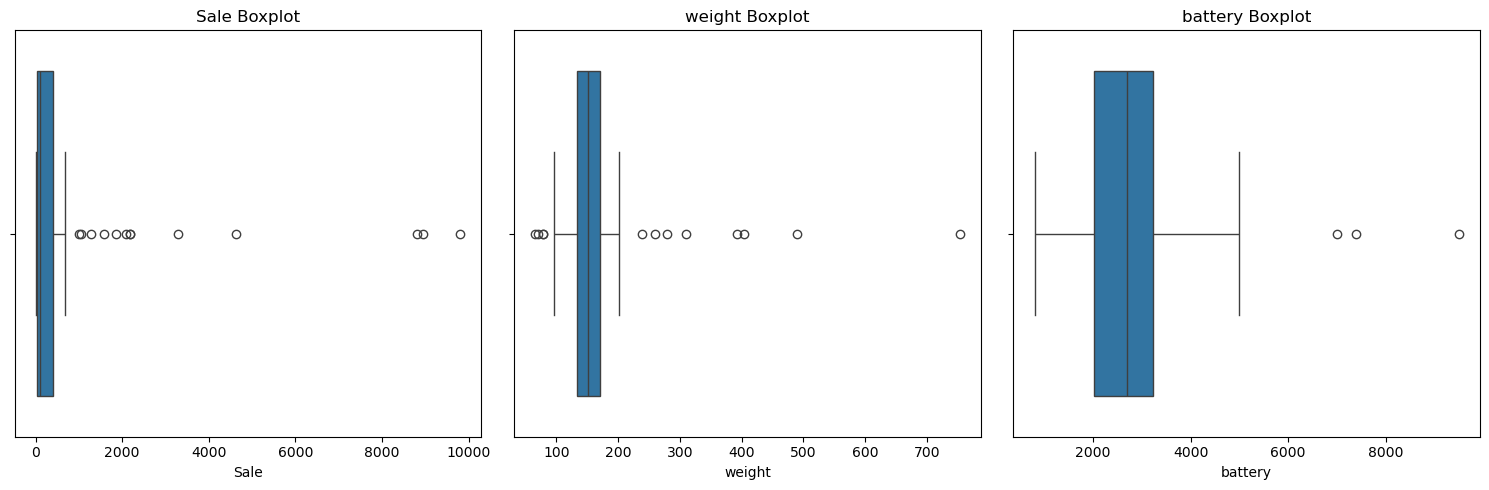

In [46]:
plt.figure(figsize=(15, 5))

for i, column in enumerate(['Sale', 'weight', 'battery']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=phone_data[column])
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='Sale', ylabel='Count'>

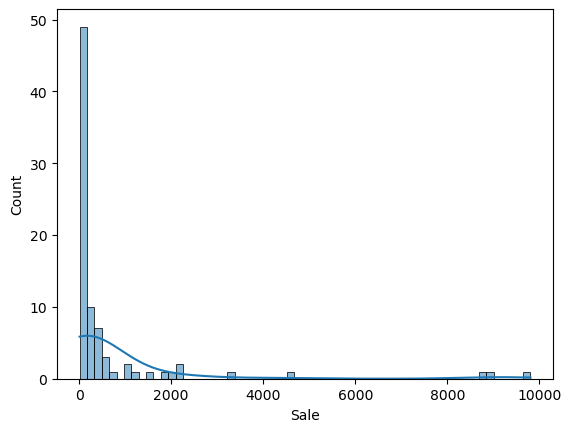

In [47]:
sns.histplot(phone_data['Sale'], kde=True)

<AxesSubplot: ylabel='Sale'>

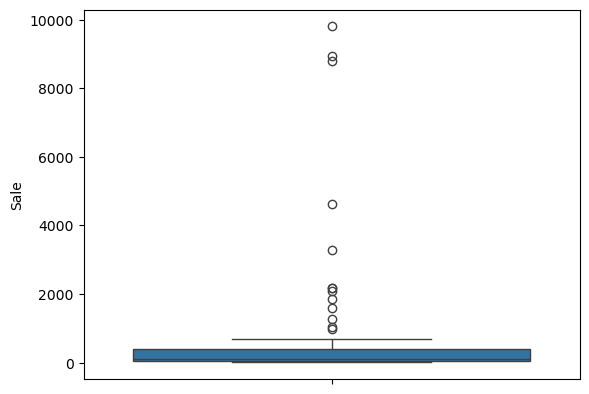

In [48]:
sns.boxplot(y=phone_data['Sale'])

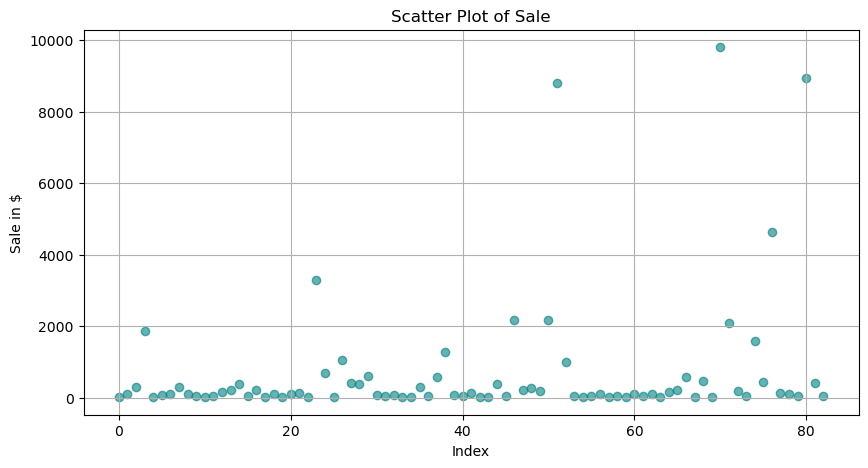

In [49]:
plt.figure(figsize=(10, 5))
plt.scatter(phone_data.index, phone_data['Sale'], alpha=0.6, c='teal')
plt.title("Scatter Plot of Sale")
plt.xlabel("Index")
plt.ylabel("Sale in $")
plt.grid(True)
plt.show()

In [50]:
phone_data.loc[phone_data['Sale'] > 3000]

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
23         290   4361  3291   238.0         5.70  515       8.0     1.950   
51         856   3260  8809   150.0         5.50  401       8.0     2.200   
70        1131   2536  9807   202.0         6.00  367       8.0     1.500   
76        1206   3551  4638   178.0         5.46  538       4.0     1.875   
80        1296   3211  8946   170.0         5.50  534       4.0     1.975   

    internal mem  RearCam  Front_Cam  battery  thickness  
23          64.0     12.0        8.0     7000        7.4  
51          64.0     20.0       20.0     3000        6.8  
70          16.0     21.5       16.0     2700        8.4  
76          64.0     12.0       16.0     4080        8.4  
80          64.0     20.0        8.0     3400        7.9

In [51]:
phone_data.loc[phone_data['Sale'] >= phone_data['Price']]

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
38         701    628  1274   102.9         2.20  128       1.0     0.208   
46         826    614  2171    69.8         1.40  129       1.0     0.208   
51         856   3260  8809   150.0         5.50  401       8.0     2.200   
70        1131   2536  9807   202.0         6.00  367       8.0     1.500   
76        1206   3551  4638   178.0         5.46  538       4.0     1.875   
80        1296   3211  8946   170.0         5.50  534       4.0     1.975   

    internal mem  RearCam  Front_Cam  battery  thickness  
38           4.0      1.3        0.9      950       18.5  
46           4.0     12.0        0.9      800       14.1  
51          64.0     20.0       20.0     3000        6.8  
70          16.0     21.5       16.0     2700        8.4  
76          64.0     12.0       16.0     4080        8.4  
80          64.0     20.0        8.0     3400        7.9

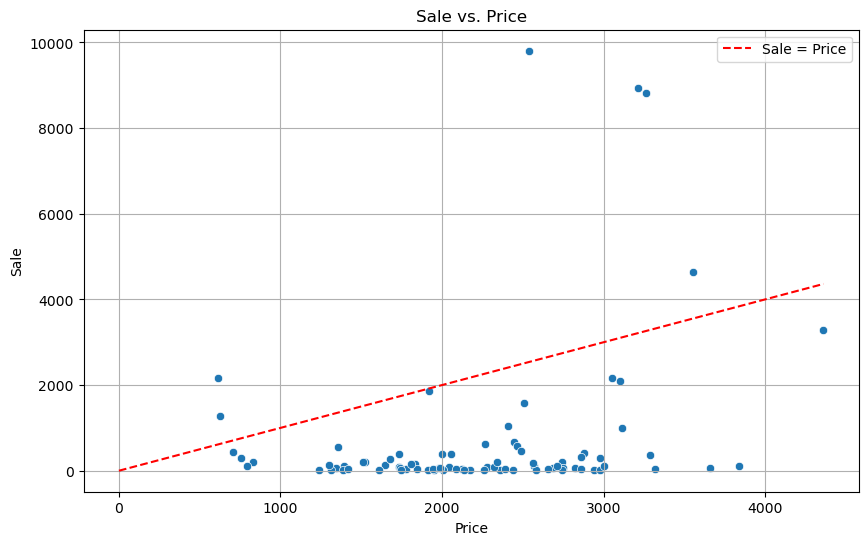

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=phone_data, x='Price', y='Sale')

x_vals = np.linspace(0, phone_data['Price'].max(), 500)

plt.plot(x_vals, x_vals, color='red', linestyle='--', label='Sale = Price')

plt.title('Sale vs. Price')
plt.xlabel('Price')
plt.ylabel('Sale')
plt.legend()
plt.grid(True)
plt.show()

# A boundary line with the same slope as y = x (i.e., slope = 1) but shifted downward will visually separate valid sales from suspicious ones — and it’s super intuitive.

# Let’s define a boundary line like this:

### y=x−k

Where k is a constant amount you’re allowing as a "max discount." For example:

If k = 1000, you're saying a sale shouldn't be more than 1000 less than the price.

This gives a line just below y = x.

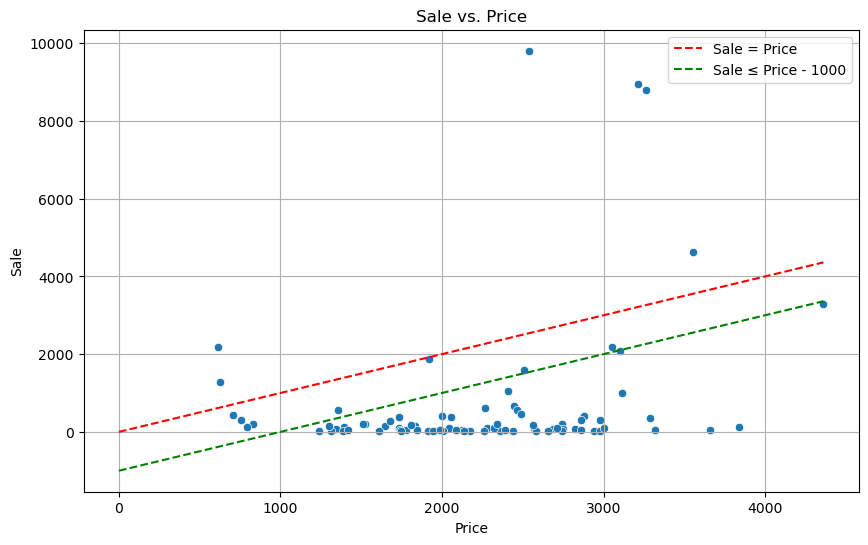

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=phone_data, x='Price', y='Sale')

# y = x line

plt.plot(x_vals, x_vals, 'r--', label='Sale = Price')

k = 1000 
plt.plot(x_vals, x_vals - k, 'g--', label=f'Sale ≤ Price - {k}')

plt.title('Sale vs. Price')
plt.xlabel('Price')
plt.ylabel('Sale')
plt.legend()
plt.grid(True)
plt.show()

# We will make the green line an upper bound for the sale

In [54]:
phone_data.loc[phone_data['Sale'] > (phone_data['Price'] - k)]

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
3           32   1921  1862   179.0         6.00  184       4.0     1.300   
7           64    754   308    77.9         2.40  167       1.0     0.208   
38         701    628  1274   102.9         2.20  128       1.0     0.208   
46         826    614  2171    69.8         1.40  129       1.0     0.208   
47         827    833   213    78.4         2.40  166       1.0     0.208   
50         851   3055  2173   158.0         5.50  401       4.0     1.875   
51         856   3260  8809   150.0         5.50  401       8.0     2.200   
62        1026    791   114    66.0         1.50  121       1.0     0.208   
66        1089   1357   564   165.0         4.66  200       4.0     1.200   
70        1131   2536  9807   202.0         6.00  367       8.0     1.500   
74        1161   2508  1584   152.0         5.20  424       4.0     2.500   
75        1198    705   427   110.0         2.20  128       1.0     0.208   
76        1206   3551  4638   178.0         5.46  538       4.0     1.875   
80        1296   3211  8946   170.0         5.50  534       4.0     1.975   

    internal mem  RearCam  Front_Cam  battery  thickness  
3            8.0     13.0        8.0     2580        8.0  
7            4.0     12.0        0.9      850       12.4  
38           4.0      1.3        0.9      950       18.5  
46           4.0     12.0        0.9      800       14.1  
47           4.0     12.0        0.9     1100       12.9  
50          64.0     16.0        8.0     3000        7.4  
51          64.0     20.0       20.0     3000        6.8  
62           4.0     12.0        0.9      800       13.2  
66           8.0      5.0        0.9     2600       11.6  
70          16.0     21.5       16.0     2700        8.4  
74          16.0     20.7        2.2     3100        7.3  
75           4.0      2.0        0.9      900       15.6  
76          64.0     12.0       16.0     4080        8.4  
80          64.0     20.0        8.0     3400        7.9

In [55]:
phone_data.loc[phone_data['Sale'] > (phone_data['Price'] - k), 'Sale'] = phone_data['Price'] - k

In [56]:
phone_data.loc[phone_data['Sale'] < 0,'Sale'] = 0

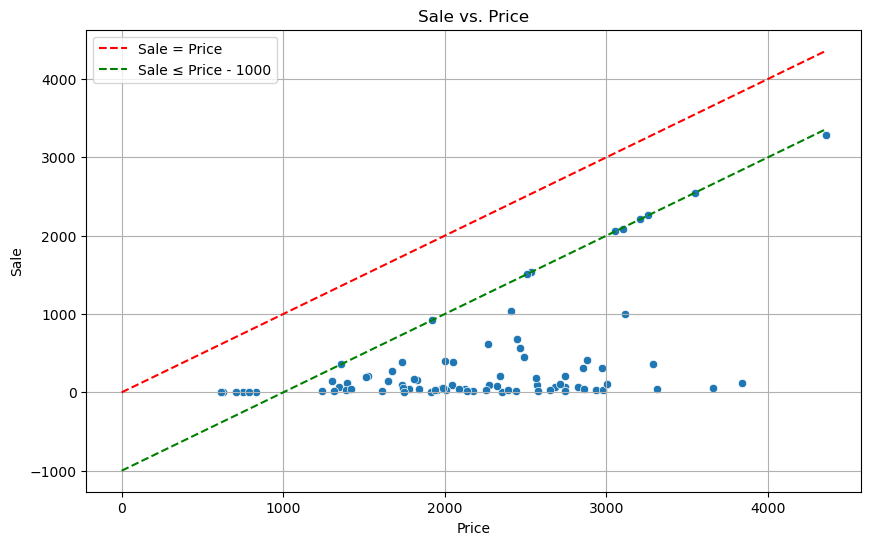

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=phone_data, x='Price', y='Sale')

# y = x line

plt.plot(x_vals, x_vals, 'r--', label='Sale = Price')

k = 1000 
plt.plot(x_vals, x_vals - k, 'g--', label=f'Sale ≤ Price - {k}')

plt.title('Sale vs. Price')
plt.xlabel('Price')
plt.ylabel('Sale')
plt.legend()
plt.grid(True)
plt.show()

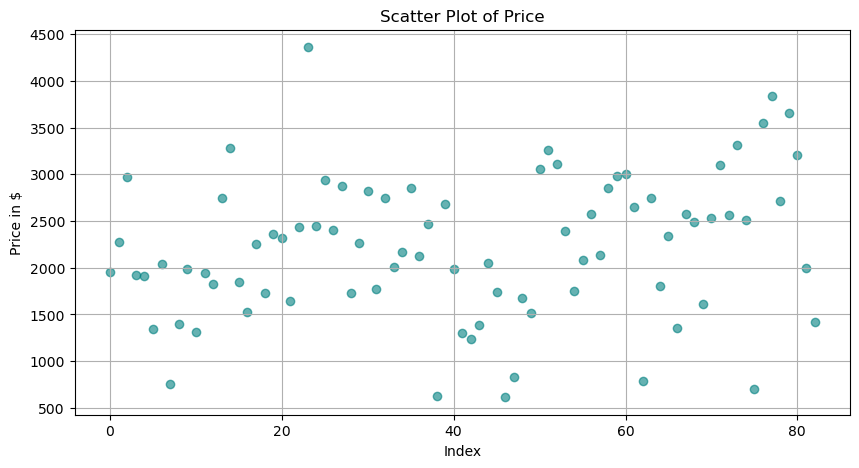

In [58]:
plt.figure(figsize=(10, 5))
plt.scatter(phone_data.index, phone_data['Price'], alpha=0.6, c='teal')
plt.title("Scatter Plot of Price")
plt.xlabel("Index")
plt.ylabel("Price in $")
plt.grid(True)
plt.show()

### Now we move to Weight

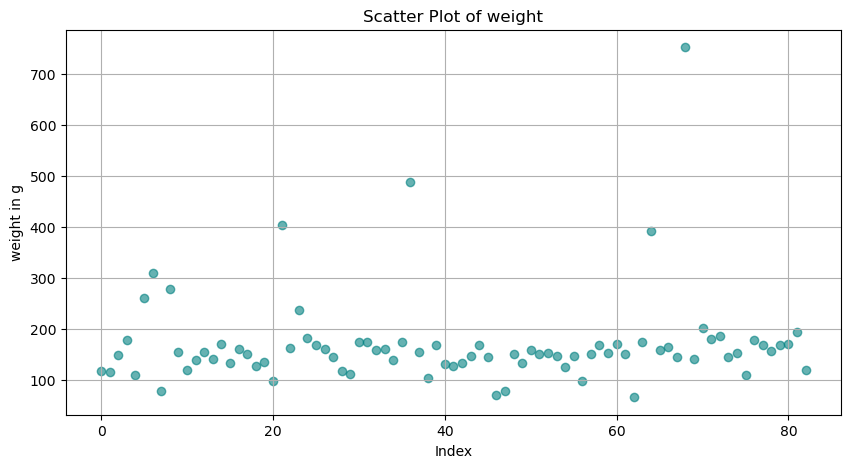

In [59]:
plt.figure(figsize=(10, 5))
plt.scatter(phone_data.index, phone_data['weight'], alpha=0.6, c='teal')
plt.title("Scatter Plot of weight")
plt.xlabel("Index")
plt.ylabel("weight in g")
plt.grid(True)
plt.show()

In [60]:
phone_data.loc[phone_data['weight'] > 250]

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
5           43   1347    67   260.0          7.0  170       2.0      1.30   
6           56   2044    93   310.0          8.0  283       8.0      2.00   
8           66   1396   114   279.0          7.0  170       4.0      1.20   
21         237   1646   141   404.0          8.0  160       4.0      1.20   
36         662   2124    37   489.0         10.1  224       4.0      2.26   
64        1062   1810   166   393.0          8.0  189       4.0      1.20   
68        1112   2491   456   753.0         12.2  247       8.0      1.60   

    internal mem  RearCam  Front_Cam  battery  thickness  
5            4.0     2.00        0.9     2820        9.1  
6            8.0     5.00        2.0     4060        7.3  
8            4.0     3.00        0.9     3240        9.0  
21           8.0     5.00        5.0     4500        9.0  
36          16.0     5.00        2.0     7400        7.8  
64          16.0     3.15        1.2     4450        9.7  
68          32.0     8.00        2.0     9500        8.0

Outliers start around 200 and go up to 700g+, which is way too heavy for a phone.

Realistic weight should be under 180g and greater than 140g.

### We will replace these values with the mean

In [61]:
phone_data.loc[phone_data['weight'] > 180, 'weight'] = phone_data['weight'].median()
phone_data.loc[phone_data['weight'] < 140, 'weight'] = phone_data['weight'].mean()

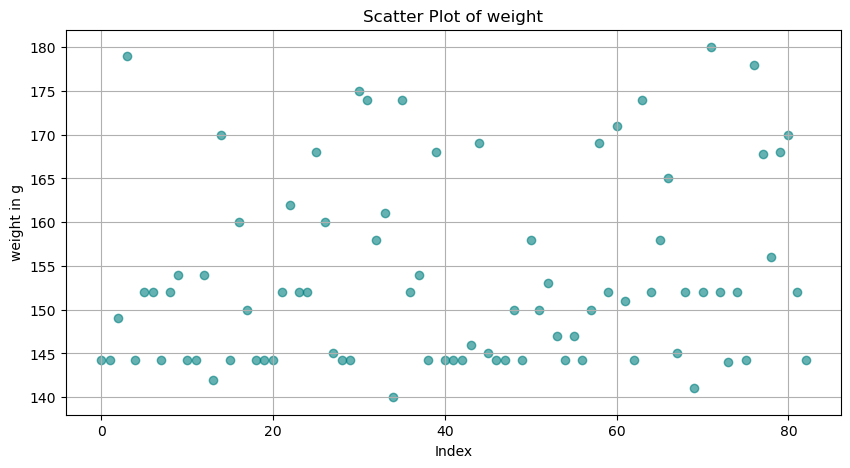

In [62]:
plt.figure(figsize=(10, 5))
plt.scatter(phone_data.index, phone_data['weight'], alpha=0.6, c='teal')
plt.title("Scatter Plot of weight")
plt.xlabel("Index")
plt.ylabel("weight in g")
plt.grid(True)
plt.show()

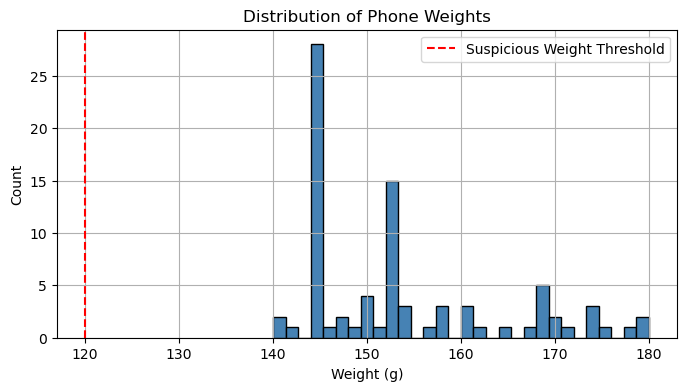

In [63]:
plt.figure(figsize=(8, 4))
plt.hist(phone_data['weight'], bins=30, color='steelblue', edgecolor='black')
plt.axvline(120, color='red', linestyle='--', label='Suspicious Weight Threshold')
plt.xlabel("Weight (g)")
plt.ylabel("Count")
plt.title("Distribution of Phone Weights")
plt.legend()
plt.grid(True)
plt.show()


### Lets discuss the Battery capacity

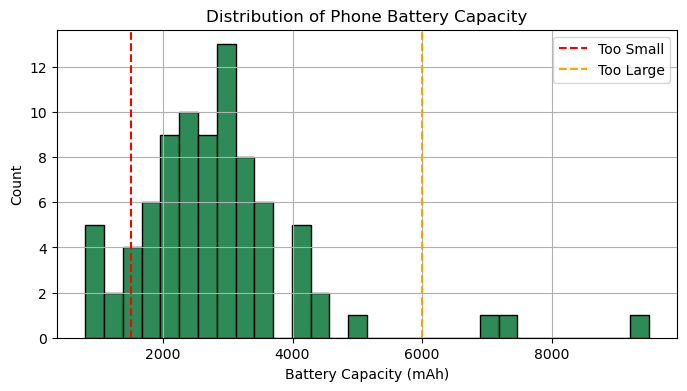

In [64]:
plt.figure(figsize=(8, 4))
plt.hist(phone_data['battery'], bins=30, color='seagreen', edgecolor='black')
plt.axvline(1500, color='red', linestyle='--', label='Too Small')
plt.axvline(6000, color='orange', linestyle='--', label='Too Large')
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Count")
plt.title("Distribution of Phone Battery Capacity")
plt.legend()
plt.grid(True)
plt.show()


In [65]:
median_battery = phone_data['battery'].median()
phone_data.loc[phone_data['battery'] < 1500, 'battery'] = median_battery
phone_data.loc[phone_data['battery'] > 6000, 'battery'] = median_battery

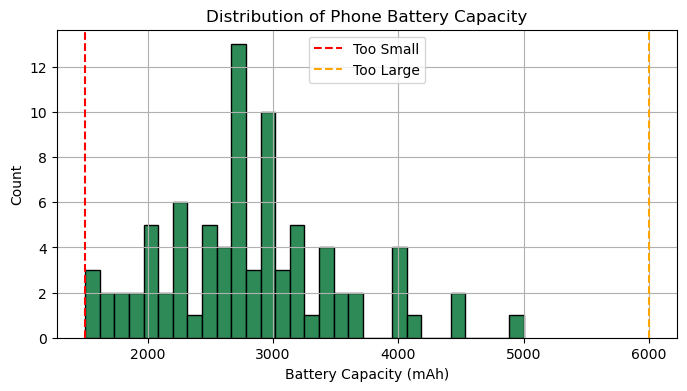

In [66]:
plt.figure(figsize=(8, 4))
plt.hist(phone_data['battery'], bins=30, color='seagreen', edgecolor='black')
plt.axvline(1500, color='red', linestyle='--', label='Too Small')
plt.axvline(6000, color='orange', linestyle='--', label='Too Large')
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Count")
plt.title("Distribution of Phone Battery Capacity")
plt.legend()
plt.grid(True)
plt.show()

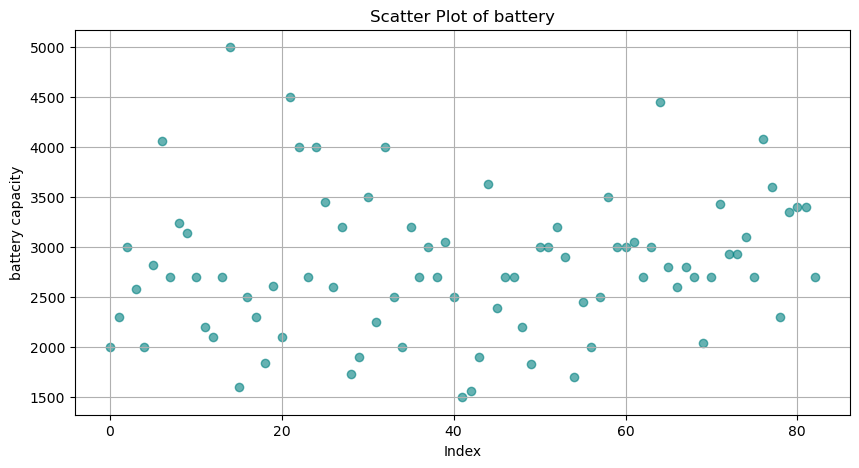

In [67]:
plt.figure(figsize=(10, 5))
plt.scatter(phone_data.index, phone_data['battery'], alpha=0.6, c='teal')
plt.title("Scatter Plot of battery")
plt.xlabel("Index")
plt.ylabel("battery capacity")
plt.grid(True)
plt.show()

In [68]:
phone_data.loc[phone_data['Price'] > 4000]

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
23         290   4361  3291   152.0          5.7  515       8.0      1.95   

    internal mem  RearCam  Front_Cam  battery  thickness  
23          64.0     12.0        8.0     2700        7.4

In [69]:
# Lets remove this record because it will cause some lack of efficency
phone_data.drop(23)

Product_id  Price  Sale      weight  Screen_size  ppi  cpu core  cpu freq  \
0           10   1950    26  144.301205         5.00  187       4.0     1.300   
1           14   2276    98  144.301205         5.00  294       8.0     1.500   
2           30   2975   307  149.000000         5.50  534       8.0     1.600   
3           32   1921   921  179.000000         6.00  184       4.0     1.300   
4           40   1916    10  144.301205         4.70  312       4.0     1.200   
..         ...    ...   ...         ...          ...  ...       ...       ...   
78        1221   2714   106  156.000000         5.50  401       8.0     1.350   
79        1248   3658    52  168.000000         5.15  428       8.0     2.450   
80        1296   3211  2211  170.000000         5.50  534       4.0     1.975   
81        1327   2001   399  152.000000         5.70  258       4.0     1.200   
82        1339   1421    40  144.301205         4.00  233       2.0     1.000   

    internal mem  RearCam  Front_Cam  battery  thickness  
0            8.0      8.0        2.0     2000        6.4  
1           16.0     13.0        5.0     2300        7.8  
2           32.0     16.0        8.0     3000        7.0  
3            8.0     13.0        8.0     2580        8.0  
4            8.0     13.0        5.0     2000        7.6  
..           ...      ...        ...      ...        ...  
78          16.0     13.0        5.0     2300        5.1  
79          64.0     12.0        8.0     3350        7.5  
80          64.0     20.0        8.0     3400        7.9  
81          16.0      8.0        1.0     3400       10.2  
82           4.0      2.0        0.9     2700        9.8  

[82 rows x 13 columns]

# Data Preparation for model

### First lets save a copy for the cleaned data

In [70]:
phone_data.to_csv('../dataset/Cleaned_data.csv', index = False)

## Feature Engineering

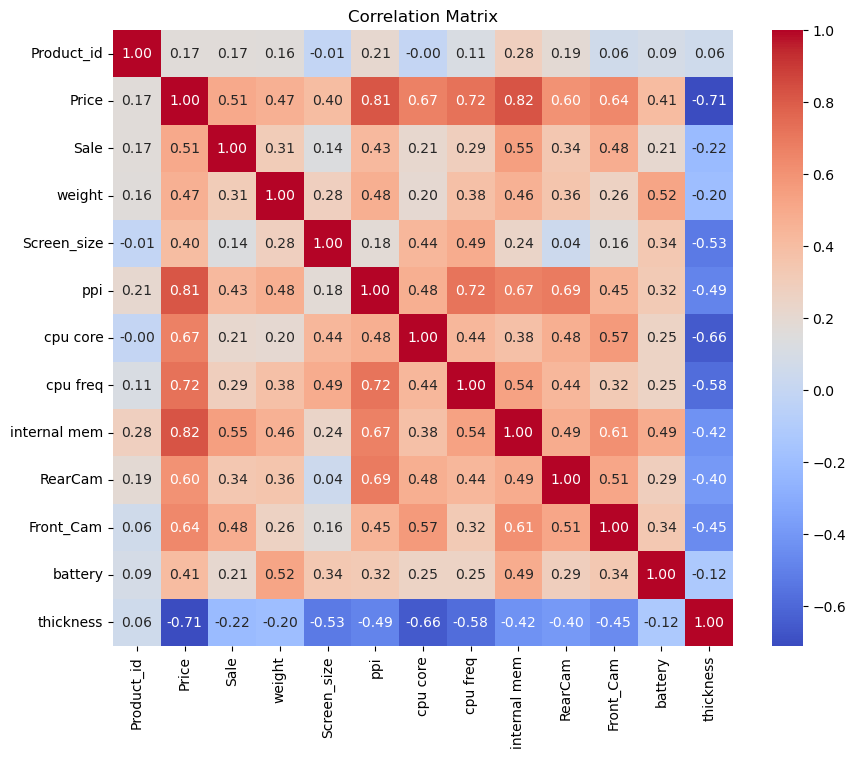

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(phone_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

🔍 So in summary:
✅ Strong Keepers: internal mem, cpu freq, cpu core, ppi, RearCam, Front_Cam, thickness

⚠️ Consider Keeping: battery, weight, Screen_size, Sale

❌ Drop: Product_id (not a real feature)

In [72]:
phone_data.head(10)

Product_id  Price  Sale      weight  Screen_size  ppi  cpu core  cpu freq  \
0          10   1950    26  144.301205          5.0  187       4.0     1.300   
1          14   2276    98  144.301205          5.0  294       8.0     1.500   
2          30   2975   307  149.000000          5.5  534       8.0     1.600   
3          32   1921   921  179.000000          6.0  184       4.0     1.300   
4          40   1916    10  144.301205          4.7  312       4.0     1.200   
5          43   1347    67  152.000000          7.0  170       2.0     1.300   
6          56   2044    93  152.000000          8.0  283       8.0     2.000   
7          64    754     0  144.301205          2.4  167       1.0     0.208   
8          66   1396   114  152.000000          7.0  170       4.0     1.200   
9          93   1984    57  154.000000          5.0  294       4.0     1.000   

   internal mem  RearCam  Front_Cam  battery  thickness  
0           8.0      8.0        2.0     2000        6.4  
1          16.0     13.0        5.0     2300        7.8  
2          32.0     16.0        8.0     3000        7.0  
3           8.0     13.0        8.0     2580        8.0  
4           8.0     13.0        5.0     2000        7.6  
5           4.0      2.0        0.9     2820        9.1  
6           8.0      5.0        2.0     4060        7.3  
7           4.0     12.0        0.9     2700       12.4  
8           4.0      3.0        0.9     3240        9.0  
9           8.0      8.0        5.0     3140        8.1

Let’s create new features that improve model performance without asking the user for extra inputs:

performance_score =	cpu core * cpu freq	

camera_score =	RearCam * 0.7 + Front_Cam * 0.3	

In [73]:
phone_data['Performance_score'] = phone_data['cpu core'] * phone_data['cpu freq']

phone_data['Camera_score'] = (phone_data['RearCam'] * 0.7) + (phone_data['Front_Cam'] * 0.3)

phone_data

Product_id  Price  Sale      weight  Screen_size  ppi  cpu core  cpu freq  \
0           10   1950    26  144.301205         5.00  187       4.0     1.300   
1           14   2276    98  144.301205         5.00  294       8.0     1.500   
2           30   2975   307  149.000000         5.50  534       8.0     1.600   
3           32   1921   921  179.000000         6.00  184       4.0     1.300   
4           40   1916    10  144.301205         4.70  312       4.0     1.200   
..         ...    ...   ...         ...          ...  ...       ...       ...   
78        1221   2714   106  156.000000         5.50  401       8.0     1.350   
79        1248   3658    52  168.000000         5.15  428       8.0     2.450   
80        1296   3211  2211  170.000000         5.50  534       4.0     1.975   
81        1327   2001   399  152.000000         5.70  258       4.0     1.200   
82        1339   1421    40  144.301205         4.00  233       2.0     1.000   

    internal mem  RearCam  Front_Cam  battery  thickness  Performance_score  \
0            8.0      8.0        2.0     2000        6.4                5.2   
1           16.0     13.0        5.0     2300        7.8               12.0   
2           32.0     16.0        8.0     3000        7.0               12.8   
3            8.0     13.0        8.0     2580        8.0                5.2   
4            8.0     13.0        5.0     2000        7.6                4.8   
..           ...      ...        ...      ...        ...                ...   
78          16.0     13.0        5.0     2300        5.1               10.8   
79          64.0     12.0        8.0     3350        7.5               19.6   
80          64.0     20.0        8.0     3400        7.9                7.9   
81          16.0      8.0        1.0     3400       10.2                4.8   
82           4.0      2.0        0.9     2700        9.8                2.0   

    Camera_score  
0           6.20  
1          10.60  
2          13.60  
3          11.50  
4          10.60  
..           ...  
78         10.60  
79         10.80  
80         16.40  
81          5.90  
82          1.67  

[83 rows x 15 columns]

## We may change some numerical data into categorical due to some reasons
### > Better generalization and less noise
### > Precise weight isn't available at prediction time But it still affects the perceived value

### We will convert weight with (Heavy, Medium, Light)

In [74]:
def weight_to_category(weight):
    if weight < 145:
        return 'Light'
    elif weight <= 160:
        return 'Medium'
    else:
        return 'Heavy'
phone_data['weight'] = phone_data['weight'].apply(weight_to_category)

In [75]:
phone_data['internal mem'].value_counts() 

internal mem
16.0    21
32.0    20
8.0     17
4.0     15
64.0    10
Name: count, dtype: int64

In [76]:
phone_data.head(20)

Product_id  Price  Sale  weight  Screen_size  ppi  cpu core  cpu freq  \
0           10   1950    26   Light          5.0  187       4.0     1.300   
1           14   2276    98   Light          5.0  294       8.0     1.500   
2           30   2975   307  Medium          5.5  534       8.0     1.600   
3           32   1921   921   Heavy          6.0  184       4.0     1.300   
4           40   1916    10   Light          4.7  312       4.0     1.200   
5           43   1347    67  Medium          7.0  170       2.0     1.300   
6           56   2044    93  Medium          8.0  283       8.0     2.000   
7           64    754     0   Light          2.4  167       1.0     0.208   
8           66   1396   114  Medium          7.0  170       4.0     1.200   
9           93   1984    57  Medium          5.0  294       4.0     1.000   
10          99   1315    14   Light          4.0  233       2.0     1.300   
11         104   1942    34   Light          4.7  469       4.0     2.150   
12         131   1831   156  Medium          5.0  294       4.0     1.200   
13         133   2744   214   Light          5.0  440       8.0     1.250   
14         143   3287   367   Heavy          5.5  401       8.0     2.000   
15         162   1843    41   Light          4.5  218       4.0     1.300   
16         183   1522   204  Medium          5.0  220       2.0     1.200   
17         187   2258    26  Medium          5.0  441       4.0     2.300   
18         198   1734    89   Light          4.5  245       4.0     1.200   
19         203   2357    10   Light          5.2  424       8.0     1.350   

    internal mem  RearCam  Front_Cam  battery  thickness  Performance_score  \
0            8.0     8.00        2.0     2000        6.4              5.200   
1           16.0    13.00        5.0     2300        7.8             12.000   
2           32.0    16.00        8.0     3000        7.0             12.800   
3            8.0    13.00        8.0     2580        8.0              5.200   
4            8.0    13.00        5.0     2000        7.6              4.800   
5            4.0     2.00        0.9     2820        9.1              2.600   
6            8.0     5.00        2.0     4060        7.3             16.000   
7            4.0    12.00        0.9     2700       12.4              0.208   
8            4.0     3.00        0.9     3240        9.0              4.800   
9            8.0     8.00        5.0     3140        8.1              4.000   
10           4.0     3.15        0.9     2700       11.0              2.600   
11          16.0    16.00        4.0     2200       10.3              8.600   
12           8.0    13.00        5.0     2100        8.4              4.800   
13          16.0    16.00        8.0     2700        8.0             10.000   
14          32.0    12.00       13.0     5000        8.0             16.000   
15           8.0     5.00        4.0     1600       10.1              5.200   
16           8.0     8.00        0.9     2500       10.8              2.400   
17          16.0    13.00        2.0     2300       10.0              9.200   
18           4.0     8.00        1.2     1840        8.5              4.800   
19          16.0    13.00        8.0     2610        7.4             10.800   

    Camera_score  
0          6.200  
1         10.600  
2         13.600  
3         11.500  
4         10.600  
5          1.670  
6          4.100  
7          8.670  
8          2.370  
9          7.100  
10         2.475  
11        12.400  
12        10.600  
13        13.600  
14        12.300  
15         4.700  
16         5.870  
17         9.700  
18         5.960  
19        11.500

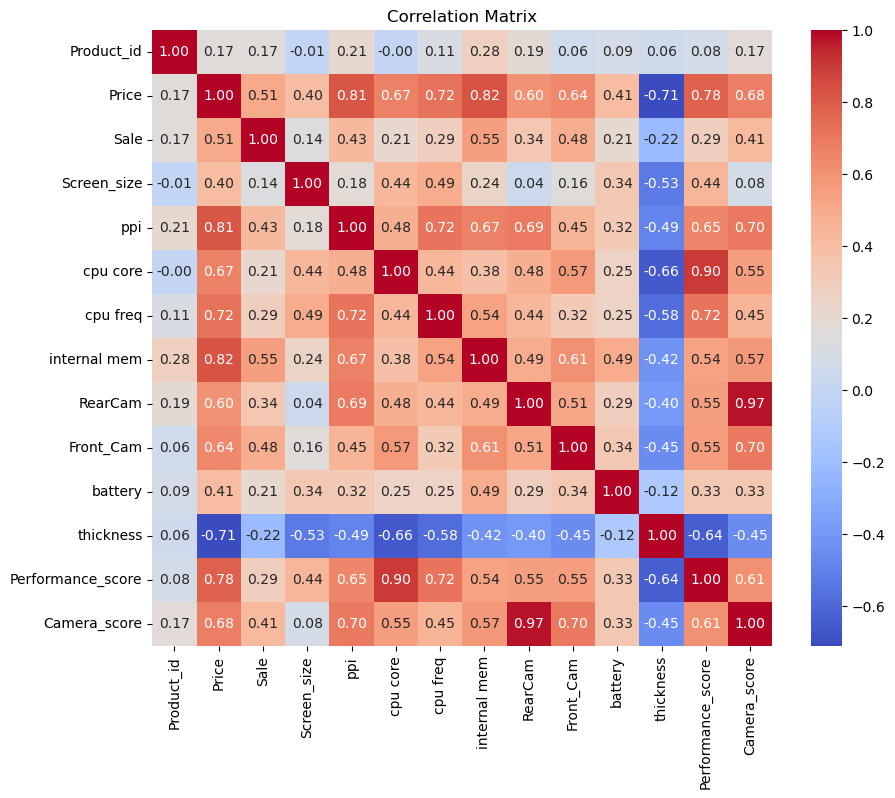

In [77]:
plt.figure(figsize=(10, 8))
data_without_weight = phone_data.drop(columns = 'weight')
sns.heatmap(data_without_weight.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# columns I would surely drop: Product_id,Sale, Screen_size

# I can drop RearCam and Front_cam but nah i don't feel like doing so, my model doesn't have enough data so I'll catch anything that may increase the accuracy of my model even a little bit

In [78]:
phone_data.drop(columns = ['Product_id', 'Sale', 'Screen_size'], inplace=True)
phone_data

Price  weight  ppi  cpu core  cpu freq  internal mem  RearCam  Front_Cam  \
0    1950   Light  187       4.0     1.300           8.0      8.0        2.0   
1    2276   Light  294       8.0     1.500          16.0     13.0        5.0   
2    2975  Medium  534       8.0     1.600          32.0     16.0        8.0   
3    1921   Heavy  184       4.0     1.300           8.0     13.0        8.0   
4    1916   Light  312       4.0     1.200           8.0     13.0        5.0   
..    ...     ...  ...       ...       ...           ...      ...        ...   
78   2714  Medium  401       8.0     1.350          16.0     13.0        5.0   
79   3658   Heavy  428       8.0     2.450          64.0     12.0        8.0   
80   3211   Heavy  534       4.0     1.975          64.0     20.0        8.0   
81   2001  Medium  258       4.0     1.200          16.0      8.0        1.0   
82   1421   Light  233       2.0     1.000           4.0      2.0        0.9   

    battery  thickness  Performance_score  Camera_score  
0      2000        6.4                5.2          6.20  
1      2300        7.8               12.0         10.60  
2      3000        7.0               12.8         13.60  
3      2580        8.0                5.2         11.50  
4      2000        7.6                4.8         10.60  
..      ...        ...                ...           ...  
78     2300        5.1               10.8         10.60  
79     3350        7.5               19.6         10.80  
80     3400        7.9                7.9         16.40  
81     3400       10.2                4.8          5.90  
82     2700        9.8                2.0          1.67  

[83 rows x 12 columns]

# Now lets encode then scale the data

In [79]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

encoder = OneHotEncoder(sparse_output=False)

encoded_weight = encoder.fit_transform(phone_data[['weight']])

encoded_weight_df = pd.DataFrame(encoded_weight, columns=encoder.get_feature_names_out(['weight']))


In [80]:
phone_data = pd.concat([phone_data.drop('weight', axis=1), encoded_weight_df], axis=1)
phone_data

Price  ppi  cpu core  cpu freq  internal mem  RearCam  Front_Cam  battery  \
0    1950  187       4.0     1.300           8.0      8.0        2.0     2000   
1    2276  294       8.0     1.500          16.0     13.0        5.0     2300   
2    2975  534       8.0     1.600          32.0     16.0        8.0     3000   
3    1921  184       4.0     1.300           8.0     13.0        8.0     2580   
4    1916  312       4.0     1.200           8.0     13.0        5.0     2000   
..    ...  ...       ...       ...           ...      ...        ...      ...   
78   2714  401       8.0     1.350          16.0     13.0        5.0     2300   
79   3658  428       8.0     2.450          64.0     12.0        8.0     3350   
80   3211  534       4.0     1.975          64.0     20.0        8.0     3400   
81   2001  258       4.0     1.200          16.0      8.0        1.0     3400   
82   1421  233       2.0     1.000           4.0      2.0        0.9     2700   

    thickness  Performance_score  Camera_score  weight_Heavy  weight_Light  \
0         6.4                5.2          6.20           0.0           1.0   
1         7.8               12.0         10.60           0.0           1.0   
2         7.0               12.8         13.60           0.0           0.0   
3         8.0                5.2         11.50           1.0           0.0   
4         7.6                4.8         10.60           0.0           1.0   
..        ...                ...           ...           ...           ...   
78        5.1               10.8         10.60           0.0           0.0   
79        7.5               19.6         10.80           1.0           0.0   
80        7.9                7.9         16.40           1.0           0.0   
81       10.2                4.8          5.90           0.0           0.0   
82        9.8                2.0          1.67           0.0           1.0   

    weight_Medium  
0             0.0  
1             0.0  
2             1.0  
3             0.0  
4             0.0  
..            ...  
78            1.0  
79            0.0  
80            0.0  
81            1.0  
82            0.0  

[83 rows x 14 columns]

In [81]:
phone_data.describe()

Price         ppi   cpu core   cpu freq  internal mem    RearCam  \
count    83.000000   83.000000  83.000000  83.000000     83.000000  83.000000   
mean   2219.084337  334.710843   4.939759   1.514373     21.831325  11.047590   
std     763.850279  134.002505   2.328767   0.565256     18.670976   5.694338   
min     614.000000  121.000000   1.000000   0.208000      4.000000   1.300000   
25%    1737.500000  233.000000   4.000000   1.200000      8.000000   5.000000   
50%    2258.000000  294.000000   4.000000   1.400000     16.000000  12.000000   
75%    2744.000000  428.000000   8.000000   1.875000     32.000000  16.000000   
max    4361.000000  806.000000   8.000000   2.700000     64.000000  23.000000   

       Front_Cam      battery  thickness  Performance_score  Camera_score  \
count  83.000000    83.000000  83.000000          83.000000     83.000000   
mean    4.889157  2799.939759   8.872289           8.049253      9.200060   
std     4.205891   705.457166   2.186729           4.753916      4.759626   
min     0.900000  1500.000000   5.100000           0.208000      1.180000   
25%     1.200000  2300.000000   7.600000           4.800000      5.000000   
50%     5.000000  2700.000000   8.400000           7.500000      9.900000   
75%     8.000000  3170.000000   9.750000          11.200000     12.700000   
max    20.000000  5000.000000  18.500000          19.600000     20.000000   

       weight_Heavy  weight_Light  weight_Medium  
count     83.000000     83.000000      83.000000  
mean       0.228916      0.337349       0.433735  
std        0.422689      0.475679       0.498602  
min        0.000000      0.000000       0.000000  
25%        0.000000      0.000000       0.000000  
50%        0.000000      0.000000       0.000000  
75%        0.000000      1.000000       1.000000  
max        1.000000      1.000000       1.000000

# The next step is to Scale The Data, But first I have to split the Data and fit the scaler only on the training set to avoid Data Leakage

# So, to be continued in the model training Notebook

In [82]:
phone_data.to_csv('../dataset/Final_data.csv', index = False)